In [1]:
# Python SQL toolkit and Object Relational Mapper
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func,extract
import numpy as np

In [2]:
# Create Database Connection
engine = create_engine('sqlite:///hawaii-new.sqlite')
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['measurements', 'stations']

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine,reflect=True)

In [5]:
Base.classes.keys()

['measurements', 'stations']

In [6]:
# create a reference of the classes
Station=Base.classes.stations

In [7]:
# create a reference of the classes
Measurement=Base.classes.measurements

In [8]:
# Using the references to classes, start querying the database
from sqlalchemy.orm import Session
session = Session(bind=engine)


In [9]:
# retrieve last 12 months of preciptation data
prcp_last_twelve_months=session.query(Measurement.date,Measurement.prcp).\
                        filter(Measurement.date<='2017-08-23').filter(Measurement.date>'2016-08-23')

for each in prcp_last_twelve_months:
    print(each)

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('2016-10-12', 0.0)
('2016-10-13', 0.0)
('20

('2016-11-22', 2.05)
('2016-11-23', 0.25)
('2016-11-24', 0.3)
('2016-11-25', 0.08)
('2016-11-26', 0.06)
('2016-11-27', 0.17)
('2016-11-28', 0.0)
('2016-11-29', 0.09)
('2016-11-30', 0.05)
('2016-12-01', 0.37)
('2016-12-02', 0.35)
('2016-12-03', 0.77)
('2016-12-04', 0.04)
('2016-12-05', 0.22)
('2016-12-06', 0.0)
('2016-12-07', 0.12)
('2016-12-08', 0.07)
('2016-12-09', 0.31)
('2016-12-10', 0.02)
('2016-12-11', 0.0)
('2016-12-12', 0.0)
('2016-12-13', 0.04)
('2016-12-14', 0.92)
('2016-12-15', 0.14)
('2016-12-16', 0.03)
('2016-12-17', 0.07)
('2016-12-18', 0.16)
('2016-12-19', 0.03)
('2016-12-20', 0.0)
('2016-12-21', 0.11)
('2016-12-22', 0.86)
('2016-12-23', 0.24)
('2016-12-24', 0.2)
('2016-12-25', 0.02)
('2016-12-26', 0.22)
('2016-12-27', 0.05)
('2016-12-28', 0.09)
('2016-12-29', 0.52)
('2016-12-30', 0.29)
('2016-12-31', 0.25)
('2017-01-01', 0.03)
('2017-01-02', 0.01)
('2017-01-03', 0.0)
('2017-01-04', 0.0)
('2017-01-05', 0.06)
('2017-01-06', 0.1)
('2017-01-07', 0.0)
('2017-01-08', 0.0)
('20

In [10]:
# load the query into a pandas dataframe and set the index to date column
# unpack the tuples into separate lists using list comprehensions
dates=[date[0] for date in prcp_last_twelve_months]
prcps=[prcp[1] for prcp in prcp_last_twelve_months]

# create dataframe using the above lists
prcp_df = pd.DataFrame({'date':dates,'prcp':prcps})
prcp_df = prcp_df.set_index('date')

prcp_df.tail()




,prcp
date,
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56
2017-08-22,0.50
2017-08-23,0.45


In [11]:
prcp_df.plot(kind='line',figsize=(20,10))

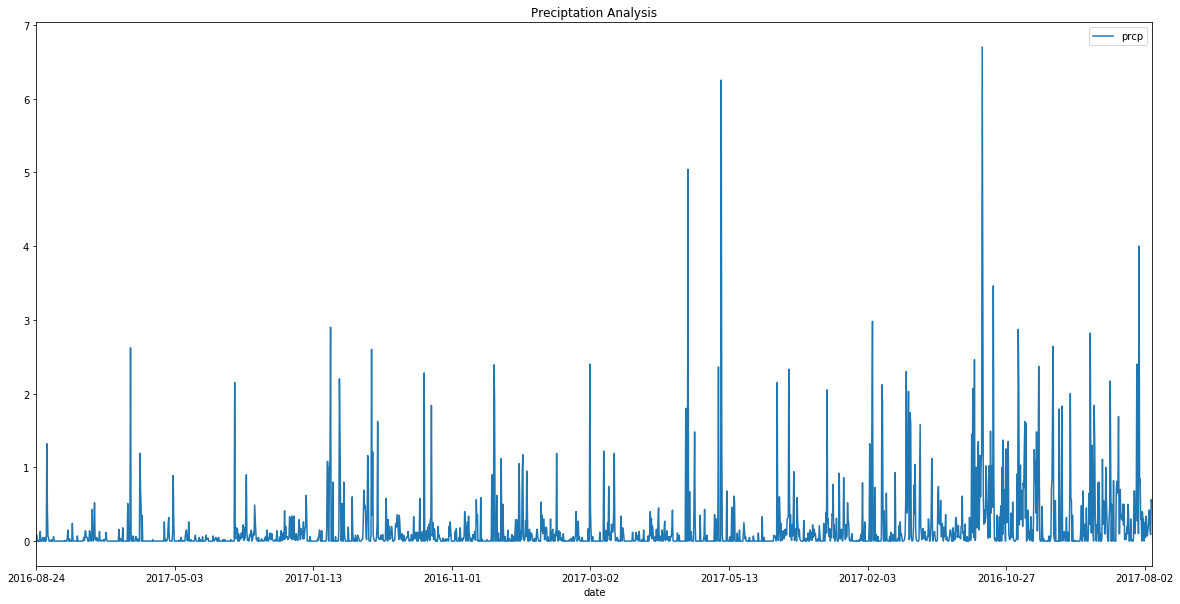

In [12]:
plt.title("Preciptation Analysis")
plt.show()

In [13]:
# summary statistics for preciptation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
### Station Analysis
# count the number of stations
station_count=session.query(Station.station).count()
print(station_count)


9


In [15]:
station_obs_count = session.query(Measurement.station_name, func.count(Measurement.station_name)).group_by(Measurement.station_name).all()

for each in station_obs_count:
    print(each)

('USC00511918', 1932)
('USC00513117', 2696)
('USC00514830', 1937)
('USC00516128', 2484)
('USC00517948', 683)
('USC00518838', 342)
('USC00519281', 2772)
('USC00519397', 2685)
('USC00519523', 2572)


In [16]:
#  unpack the above tuple into separate lists
station_names = [res[0] for res in station_obs_count]
obs_counts = [res[1] for res in station_obs_count]

station_obs_df = pd.DataFrame({'station_name':station_names,'obs_count':obs_counts})
station_obs_df = station_obs_df.sort_values(by='obs_count',ascending=False)
station_obs_df

,obs_count,station_name
6,2772,USC00519281
1,2696,USC00513117
7,2685,USC00519397
8,2572,USC00519523
3,2484,USC00516128
2,1937,USC00514830
0,1932,USC00511918
4,683,USC00517948
5,342,USC00518838


In [17]:
# active station
active_station = station_obs_df.loc[station_obs_df["obs_count"] == 2772,:]
active_station

,obs_count,station_name
6,2772,USC00519281


In [18]:
# Temperature observation data for last 12 months
# retrieve last 12 months of preciptation data and filter the data for the most active station
tobs_last_twelve_months=session.query(Measurement.date,Measurement.tobs).\
                        filter(Measurement.date<='2017-08-23').filter(Measurement.date>'2016-08-23').filter(Measurement.station_name=='USC00519281')

for each in tobs_last_twelve_months:
    print(each)

('2016-08-24', 77)
('2016-08-25', 80)
('2016-08-26', 80)
('2016-08-27', 75)
('2016-08-28', 73)
('2016-08-29', 78)
('2016-08-30', 77)
('2016-08-31', 78)
('2016-09-01', 80)
('2016-09-02', 80)
('2016-09-03', 78)
('2016-09-04', 78)
('2016-09-05', 78)
('2016-09-06', 73)
('2016-09-07', 74)
('2016-09-08', 80)
('2016-09-09', 79)
('2016-09-10', 77)
('2016-09-11', 80)
('2016-09-12', 76)
('2016-09-13', 79)
('2016-09-14', 75)
('2016-09-15', 79)
('2016-09-16', 78)
('2016-09-17', 79)
('2016-09-18', 78)
('2016-09-19', 78)
('2016-09-20', 76)
('2016-09-21', 74)
('2016-09-22', 77)
('2016-09-23', 78)
('2016-09-24', 79)
('2016-09-25', 79)
('2016-09-26', 77)
('2016-09-27', 80)
('2016-09-28', 78)
('2016-09-29', 78)
('2016-09-30', 78)
('2016-10-01', 77)
('2016-10-02', 79)
('2016-10-03', 79)
('2016-10-04', 79)
('2016-10-05', 79)
('2016-10-06', 75)
('2016-10-07', 76)
('2016-10-08', 73)
('2016-10-09', 72)
('2016-10-10', 71)
('2016-10-11', 77)
('2016-10-12', 79)
('2016-10-13', 78)
('2016-10-14', 79)
('2016-10-15

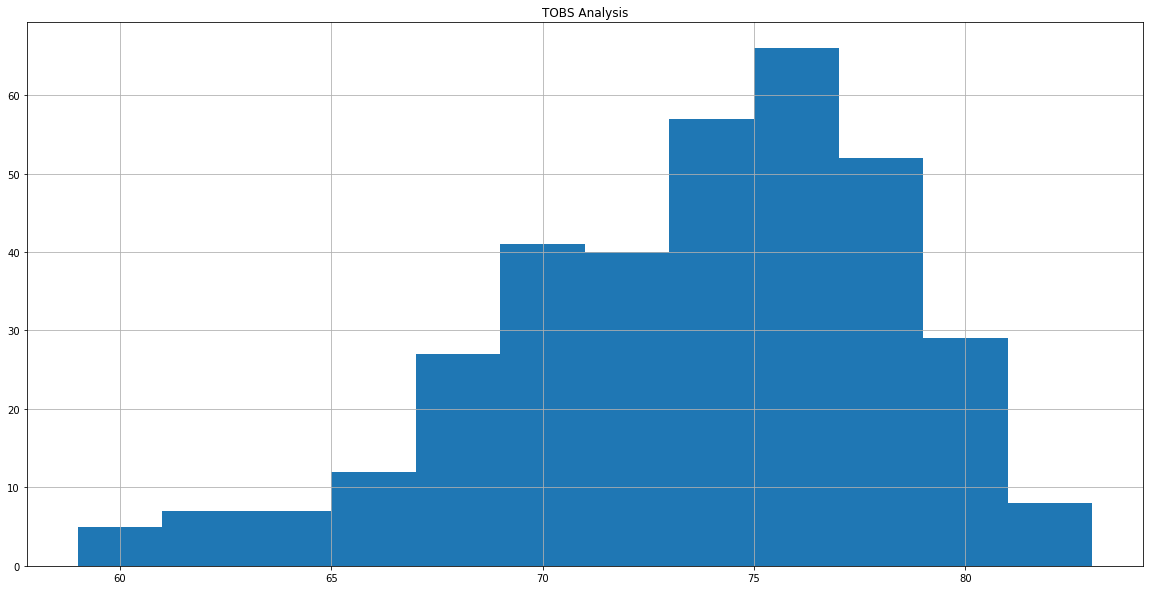

In [19]:
#  unpack the above tuple into separate lists
dates_tobs = [res[0] for res in tobs_last_twelve_months]
tobs = [res[1] for res in tobs_last_twelve_months]

tobs_df = pd.DataFrame({'date':dates_tobs,'tobs':tobs})
#tobs_df = tobs_df.sort_values(by='obs_count',ascending=False)

tobs_df = tobs_df.set_index('date')
tobs_df.head()

# histogram with bins=12
tobs_df.hist(bins=12,figsize=(20,10))
plt.title("TOBS Analysis")
plt.show()

In [20]:
# Temperature Analysis
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
from datetime import datetime,date


def calc_temps(start_date, end_date):
    datetime_object_start = datetime.strptime(start_date, '%Y-%m-%d').date()
    datetime_object_end = datetime.strptime(end_date, '%Y-%m-%d').date()
    if datetime_object_start.year>2017 and datetime_object_end.year>2017:
        start_date_p = datetime_object_start.replace(year=2017)
      
        end_date_p = datetime_object_end.replace(year=2017)
        start_date = start_date_p.strftime('%Y-%m-%d')
        end_date = end_date_p.strftime('%Y-%m-%d')


    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2019-02-28', '2019-03-05'))


[(64, 72.0, 78)]


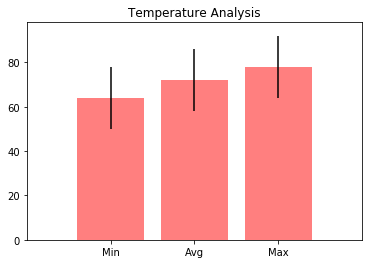

In [21]:
# bar chart with error bars for temperature analysis
y=[64,72.0,78]
x= np.arange(0, len(y), 1)
plt.bar(x, y, yerr=max(y)-min(y),color='r', alpha=0.5)
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x]
plt.xticks(x, ["Min", "Avg", "Max"])
# Sets the x limits of the current chart
plt.xlim(-1, len(x))
# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.title("Temperature Analysis")
plt.show()